# USED CAR PRICE PREDICTION

### Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

##### Importing necessary Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("UsedCarsDataset.csv")
df

Unnamed: 0                   Car_Name Fuel_type  Kilometers Engine_disp  \
0              0         2020 Datsun RediGO    Petrol  23,840 kms         799   
1              1          2016 Toyota Camry    Petrol  60,343 kms        2494   
2              2         2017 Maruti Baleno    Petrol  38,155 kms        1197   
3              3         2018 Hyundai Verna    Petrol  54,282 kms        1591   
4              4          2017 Jeep Compass    Diesel  58,463 kms        1956   
...          ...                        ...       ...         ...         ...   
6536        6536            2020 Kia Seltos    Petrol  16,000 kms        1497   
6537        6537  2017 Toyota Innova Crysta    Diesel  39,109 kms        2393   
6538        6538          2020 Jeep Compass    Diesel  15,101 kms        1956   
6539        6539       2022 Mahindra XUV700    Petrol   8,000 kms        1999   
6540        6540           2013 Mini Cooper    Diesel  47,000 kms        1998   

      Gear_type Milage_in_km/ltr Seating_cap       color Max_power  \
0        Manual            20.71           5  Opal White     53.64   
1     Automatic            12.98           5  Grey Metal     178.4   
2        Manual             21.4           5    Ray blue      83.1   
3        Manual               17           5       White     121.3   
4        Manual             17.1           5  Exotic Red       173   
...         ...              ...         ...         ...       ...   
6536  Automatic                -           5       White    113.43   
6537     Manual            13.68           7        Grey    147.51   
6538     Manual             17.1           5        Grey       170   
6539     Manual                -           5       White    197.13   
6540  Automatic             23.8           5         Red       112   

     front_brake_type rear_brake_type cargo_volume height width length Weight  \
0                Disc            Drum          222   1546  1574   3435      -   
1     Ventilated Disc      Solid Disc   436-litres   1480  1825   4850   2000   
2                Disc            Drum   339-litres   1510  1745   3995   1340   
3                Disc            Drum          480   1475  1729   4440      -   
4                Disc           Discs   408-litres   1640  1818   4395      -   
...               ...             ...          ...    ...   ...    ...    ...   
6536             Disc            Disc          433   1645  1800   4315      -   
6537             Disc            Drum   300-litres   1795  1830   4735   2430   
6538             Disc           Discs   408-litres   1640  1818   4395      -   
6539  Ventilated Disc      Solid Disc            -   1755  1890   4695      -   
6540             Disc            Drum   350-litres   1561  1789   4097   1780   

     Insp_score top_speed   Car_price  
0           NaN         -   3.81 Lakh  
1           NaN  210 Kmph  16.66 Lakh  
2           NaN  180 Kmph   6.33 Lakh  
3           NaN         -  10.14 Lakh  
4           NaN         -  12.30 Lakh  
...         ...       ...         ...  
6536          -         -  16.40 Lakh  
6537          -         -  16.95 Lakh  
6538          -         -  16.95 Lakh  
6539          -         -  19.53 Lakh  
6540          -  180 Kmph  15.75 Lakh  

[6541 rows x 20 columns]

The dataset having 6541 rows and 20 columns, contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Car_Price" which stores the price of the used cars and it is continuous in nature which makes this to be a "Regression Problem".

## Data Description (Attribute Information)

|Serial No||Variable||Definition|
|--------------------||--------------------||--------------------|
|1||Car_Name||Name of the cars with manufacturing year|
|2||Fuel_type||Type of fuel used for car engine|
|3||Kilometers||Car running in kms till the date|
|4||Engine_disp||Engine displacement/engine CC|
|5||Gear_transmission||Type of gear transmission used in car|
|6||Milage_in_km/ltr||Overall milage of car in Km/ltr|
|7||Seating_cap||Number of seats available in the car|
|8||color||Color of the car|
|9||Max_power||Maximum power of engine used in car in bhp|
|10||front_brake_type||Type of brake system used for front-side wheels|
|11||rear_brake_type||Type of brake system used for back-side wheels|
|12||cargo_volume||Total cubic feet of space in a car's cargo area|
|13||height||Total height of car in mm|
|14||width||Width of car in mm|
|15||length||Total length of the car in mm|
|16||Weight||Gross weight of the car in kg|
|17||Insp_score||Inspection rating out of 10|
|18||top_speed||Maximum speed limit of the car in km per hours|
|19||Car_price||Price of the car|

## Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Car_Name', 'Fuel_type', 'Kilometers', 'Engine_disp', 'Gear_type',
       'Milage_in_km/ltr', 'Seating_cap', 'color', 'Max_power',
       'front_brake_type', 'rear_brake_type', 'cargo_volume', 'height',
       'width', 'length', 'Weight', 'Insp_score', 'top_speed', 'Car_price'],
      dtype='object')


In [5]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          6541 non-null   object
 1   Fuel_type         6541 non-null   object
 2   Kilometers        6541 non-null   object
 3   Engine_disp       6541 non-null   object
 4   Gear_type         6541 non-null   object
 5   Milage_in_km/ltr  6541 non-null   object
 6   Seating_cap       6536 non-null   object
 7   color             6541 non-null   object
 8   Max_power         6541 non-null   object
 9   front_brake_type  6535 non-null   object
 10  rear_brake_type   6535 non-null   object
 11  cargo_volume      6535 non-null   object
 12  height            6535 non-null   object
 13  width             6535 non-null   object
 14  length            6535 non-null   object
 15  Weight            6538 non-null   object
 16  Insp_score        5782 non-null   object
 17  top_speed     

All columns are showing as Object types

In [6]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Car_Name                         1233
Fuel_type                           5
Kilometers                       3138
Engine_disp                       145
Gear_type                           2
Milage_in_km/ltr                  466
Seating_cap                         9
color                             300
Max_power                         433
front_brake_type                   29
rear_brake_type                    31
cargo_volume                      306
height                            248
width                             226
length                            326
Weight                            254
Insp_score                         10
top_speed                         268
Car_price                        1313

In [7]:
# Displaying the columns containing "-" sign count and their % i.e. ((count of "-")/6541)/100

unwanted_value = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
unwanted_value.columns=['Count of "-"']
unwanted_value['% of "-" sign']=unwanted_value['Count of "-"']/65.41     # 6541)/100 = 65.41
unwanted_value

Count of "-"  % of "-" sign
Insp_score                5232      79.987769
Weight                    3392      51.857514
top_speed                 2440      37.303165
cargo_volume              1119      17.107476
Milage_in_km/ltr           246       3.760893
front_brake_type           154       2.354380
rear_brake_type            154       2.354380
width                      153       2.339092
length                     150       2.293227
height                     150       2.293227
Max_power                  130       1.987464
Engine_disp                 97       1.482954
color                       96       1.467665
Seating_cap                 95       1.452377
Car_Name                     0       0.000000
Fuel_type                    0       0.000000
Gear_type                    0       0.000000
Kilometers                   0       0.000000
Car_price                    0       0.000000

From the above output we can notice the columns having "-" sign. The columns "Insp_score" and "Weight" have more than 50% of "-" sign. So, we can drop those columns. And we will treat the remaining columns having these sign as NAN values, so that we can easily treat them using appropriate imputation techniques.

In [8]:
# Dropping the columns having more than 50% of "-" sign
df.drop(["Insp_score", "Weight"],axis=1,inplace=True)

I have dropped the columns which are not necessary to our predictions.

In [9]:
# Replacing the sign as NAN values
df.replace('-',np.nan, inplace = True)
df.replace('null',np.nan, inplace = True)

### Car_Name

The column Car_Name is containing manufacturing year of the car, Brand name of the car and model name of the car. So, I will be extracting 3 different columns from the column Car_Name.

In [10]:
# Extracting the feature "Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df['Car_Name'].str[0:4]

# Creating car_name column and storing the remaining values other than year in it. 
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as I have stored the data in car_name column instead
df.drop(columns = 'Car_Name', axis=1, inplace = True)


In [11]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'Car_name', axis=1, inplace = True)     # Dropping Car_name column after extraction

In [12]:
# Moving the columns Model, Brand and Manufacturing_year to the first, second & third position of dataframe respectively
df.insert(0, 'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

Model    Brand Manufacturing_year Fuel_type  Kilometers Engine_disp  \
0   RediGO   Datsun               2020    Petrol  23,840 kms         799   
1    Camry   Toyota               2016    Petrol  60,343 kms        2494   
2   Baleno   Maruti               2017    Petrol  38,155 kms        1197   
3    Verna  Hyundai               2018    Petrol  54,282 kms        1591   
4  Compass     Jeep               2017    Diesel  58,463 kms        1956   

   Gear_type Milage_in_km/ltr Seating_cap       color Max_power  \
0     Manual            20.71           5  Opal White     53.64   
1  Automatic            12.98           5  Grey Metal     178.4   
2     Manual             21.4           5    Ray blue      83.1   
3     Manual               17           5       White     121.3   
4     Manual             17.1           5  Exotic Red       173   

  front_brake_type rear_brake_type cargo_volume height width length top_speed  \
0             Disc            Drum          222   1546  1574   3435       NaN   
1  Ventilated Disc      Solid Disc   436-litres   1480  1825   4850  210 Kmph   
2             Disc            Drum   339-litres   1510  1745   3995  180 Kmph   
3             Disc            Drum          480   1475  1729   4440       NaN   
4             Disc           Discs   408-litres   1640  1818   4395       NaN   

    Car_price  
0   3.81 Lakh  
1  16.66 Lakh  
2   6.33 Lakh  
3  10.14 Lakh  
4  12.30 Lakh

As we can see, we have successfully extracted the features Manufacturing_year, Brand and Model from Car_name column and moved these columns from last position to starting position of the dataframe using pop() method.

### Kilometers

The column "Kilometers" is showing object data type since it is having some string value like kms, and "," sign in it. But it should be continuous data so, I will remove string value "kms" and the comma sign "," by replacing them with empty space and then convert the column into float data type.

In [13]:
# Replacing kms and "," sign by empty space from the column
df['Kilometers'] = df['Kilometers'].str.replace('kms','')
df['Kilometers'] = df['Kilometers'].str.replace(',','')

In [14]:
# Converting object data type into float data type
df['Kilometers'] = df['Kilometers'].astype('float')

I have successfully converted string values and comma sign from the column and also converted object data type of "Running_in_kms" column into float data type

### Car_price

The target variable "Car_price" should be continuous data but due to some string values like "Lakh", "Cr" and "," it is showing as object data type. So, we will replace 'Lakh' by 100000, 'Cr' by 10000000 and "," by empty space. Then we will split it into two columns as price_a and price_b, where price_a column to be having numerical entries (like 5.50, 4.50 etc) which are present in the Car_price column and price_b column to be having string values like "Lakh", "Cr". That is storing numerical values in price_a column and string values in price_b column and after that multiply these two columns to get exact car price in numerical format.

In [15]:
# Replacing string values and "," sign 
df['Car_Price'] = df['Car_price'].str.replace('Lakh','100000')
df['Car_Price'] = df['Car_Price'].str.replace(',','')
df['Car_Price'] = df['Car_Price'].str.replace('Cr','10000000')

In [16]:
# Splitting the column into two columns
df[['price_a','price_b']] = df.Car_Price.str.split(expand=True)

In [17]:
# Converting object data type into float data type
df['price_a'] = df['price_a'].astype('float')
df['price_b'] = df['price_b'].astype('float')

In [18]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_a is:",df.price_a.isnull().sum())
print("No of null values in price_b is:",df.price_b.isnull().sum())

No of null values in price_a is: 0
No of null values in price_b is: 57


As we can observe there are 57 missing values in the column after splitting target variable. As the column price_b contains string values like "Lakh" and "Cr" so, we will fill the null values by 1.

In [19]:
# Filling null values in price_b column by 1
df['price_b']=df['price_b'].fillna(value = 1)

In [20]:
# Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_a'] * df['price_b']

In [21]:
# Dropping unwanted columns
df.drop(columns = ['Car_price','price_a','price_b'], axis=1, inplace = True)
df.head()

Model    Brand Manufacturing_year Fuel_type  Kilometers Engine_disp  \
0   RediGO   Datsun               2020    Petrol     23840.0         799   
1    Camry   Toyota               2016    Petrol     60343.0        2494   
2   Baleno   Maruti               2017    Petrol     38155.0        1197   
3    Verna  Hyundai               2018    Petrol     54282.0        1591   
4  Compass     Jeep               2017    Diesel     58463.0        1956   

   Gear_type Milage_in_km/ltr Seating_cap       color Max_power  \
0     Manual            20.71           5  Opal White     53.64   
1  Automatic            12.98           5  Grey Metal     178.4   
2     Manual             21.4           5    Ray blue      83.1   
3     Manual               17           5       White     121.3   
4     Manual             17.1           5  Exotic Red       173   

  front_brake_type rear_brake_type cargo_volume height width length top_speed  \
0             Disc            Drum          222   1546  1574   3435       NaN   
1  Ventilated Disc      Solid Disc   436-litres   1480  1825   4850  210 Kmph   
2             Disc            Drum   339-litres   1510  1745   3995  180 Kmph   
3             Disc            Drum          480   1475  1729   4440       NaN   
4             Disc           Discs   408-litres   1640  1818   4395       NaN   

   Car_Price  
0   381000.0  
1  1666000.0  
2   633000.0  
3  1014000.0  
4  1230000.0

As we can observe, the target column has been cleaned which is now continuous.

### Milage_in_km/ltr

The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type

In [22]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

### Max_power

The column "Max_power" contains some string values like PS, ps, Bh and P. Let's replace them as well and we will convert this column to float datatype.

In [23]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')
df["Max_power"] = df["Max_power"].str.replace("p",'')
df['Max_power'] = df['Max_power'].str.replace("[","")
df['Max_power'] = df['Max_power'].str.replace("k","")
df['Max_power'] = df['Max_power'].str.replace("(",".")
df['Max_power'] = df['Max_power'].str.replace("a","")
df['Max_power'] = df['Max_power'].str.replace("H","")
df['Max_power'] = df['Max_power'].str.replace("h","")
df['Max_power'] = df['Max_power'].str.replace(" ","")


In [24]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.

### front_brake_type

The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.

In [25]:
# Checking the value count of the column "front_brake_type"
df.front_brake_type.value_counts()

Disc                                          3986
Ventilated Disc                               2095
Solid Disc                                      67
Ventilated Discs                                48
Disc & Caliper Type                             46
Disk                                            25
Ventilated discs                                19
Ventilated DIsc                                 18
Vantilated Disc                                 12
Ventilated Disk                                 10
Multilateral Disc                                8
Drum                                             6
Disc & Drum                                      5
Electric Parking Brake                           5
Ventillated Disc                                 4
Disc, 236 mm                                     4
Ventlated Disc                                   4
Single Piston Sliding Caliper, Vented Disc       4
Discs                                            3
disc                           

In [26]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [36]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                          4088
Ventilated Disc                               2212
Disc & Caliper Type                             46
Multilateral Disc                                8
Drum                                             6
Disc & Drum                                      5
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       4
Booster assisted ventilated disc                 2
Dual Circuit with ABS, ABS with BAS              1
Ventilated & Grooved Steel Discs                 1
8-piston caliper front brakes                    1
Vacuum assisted hydraulic dual circuit w         1
Disc,internally ventilated                       1
Name: front_brake_type, dtype: int64

### rear_brake_type

In [27]:
# Checking the value counts of the column "rear_brake_type"
df.rear_brake_type.value_counts()

Drum                                          4619
Disc                                          1092
Ventilated Disc                                223
Solid Disc                                     154
Discs                                           68
Disc & Caliper Type                             46
Leading-Trailing Drum                           33
Self-Adjusting Drum                             23
Drums                                           19
Ventilated discs                                19
Ventilated Discs                                19
Leading & Trailing Drum                         16
Ventilated Drum                                  6
Self Adjusting Drums                             6
Electric Parking Brake                           5
Self Adjusting Drum                              5
Disc & Drum                                      5
Drums 180 mm                                     4
Single Piston Sliding Caliper, Vented Disc       4
drum                           

In [28]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("ventilated disc","Ventilated Disc",inplace=True)



df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

df["rear_brake_type"].replace("262mm Disc & Drum Combination","Disc & Drum",inplace=True)

df["rear_brake_type"].replace("Drum in Discs","Drum in disc",inplace=True)

In [29]:
# Checking the value counts of the column after grouping
df.rear_brake_type.value_counts()

Drum                                          4645
Disc                                          1314
Ventilated Disc                                264
Leading-Trailing Drum                           49
Disc & Caliper Type                             46
Self-Adjusting Drum                             34
Disc & Drum                                      6
Ventilated Drum                                  6
Electric Parking Brake                           5
Single Piston Sliding Caliper, Vented Disc       4
Booster assisted drum                            2
Drum`                                            1
Dual Circuit with ABS, ABS with BAS              1
Ventilated & Grooved Steel Discs                 1
Perforated disc brakes                           1
Drum in disc                                     1
Vacuum assisted hydraulic dual circuit w         1
Name: rear_brake_type, dtype: int64

We have now grouped the similar categories present in the columns.

From the dataset we can also observe some of the features like "Engine_disp", "height", "width", "length", "Weight", "top_speed", and "Seating_cap" have numeircal data (float type) but due to the presence of "," sign, it's showing object datatype. Let's replace "," sign by empty space and convert the columns into float datatype as these columns contains continuous data.

In [30]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]   # Getting numerical entries

# Converting the column into float data type
df.height = df.height.astype('float')

# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Manufacturing_year

The column "Manufacturing_year" give the car made year, here using "Manufacturing_year" column I will be extracting new column as "Car_age" which shows us that how old the car is

In [31]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2018    873
2017    804
2016    699
2015    689
2019    572
2014    569
2013    411
2020    399
2012    370
2021    353
2011    239
2010    174
2009     93
2022     77
2007     71
2008     70
2006     28
2005     16
2004     13
2003     13
2002      3
2000      2
2001      2
1999      1
Name: Manufacturing_year, dtype: int64

In [32]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2022 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

### Cargo_volume

In [33]:
df.cargo_volume.value_counts()

510-litres    297
400-litres    234
339-litres    185
295-litres    162
480-litres    111
             ... 
110-litres      1
160litres       1
248-litre       1
510-litre       1
784-litres      1
Name: cargo_volume, Length: 305, dtype: int64

In [34]:
df['cargo_volume']=df['cargo_volume'].str.replace("litre","")
df['cargo_volume']=df['cargo_volume'].str.replace("Litre","")
df['cargo_volume']=df['cargo_volume'].str.replace("-","")
df['cargo_volume']=df['cargo_volume'].str.replace("s","")
df['cargo_volume']=df['cargo_volume'].str.replace("Liters","")
df['cargo_volume']=df['cargo_volume'].str.replace("liters","")
df['cargo_volume']=df['cargo_volume'].str.replace("liter","")
df['cargo_volume']=df['cargo_volume'].str.replace("lit","")
df['cargo_volume']=df['cargo_volume'].str.replace("Lit","")
df['cargo_volume']=df['cargo_volume'].str.replace("l","")
df['cargo_volume']=df['cargo_volume'].str.replace("L","")
df['cargo_volume']=df['cargo_volume'].str.replace(" ","")
df['cargo_volume']=df['cargo_volume'].str.replace("er","")
df['cargo_volume']=df['cargo_volume'].str.replace("tr","")
df['cargo_volume']=df['cargo_volume'].str.replace("(3rdRowFoded)","")
df['cargo_volume']=df['cargo_volume'].str.replace("(","")
df['cargo_volume']=df['cargo_volume'].str.replace(")","")
df['cargo_volume']=df['cargo_volume'].str.replace("?",".")
 

df.cargo_volume=df.cargo_volume.astype('float')

In [35]:
# Checking the datatypes of the columns
df.dtypes

Model                object
Brand                object
Fuel_type            object
Kilometers          float64
Engine_disp         float64
Gear_type            object
Milage_in_km/ltr    float64
Seating_cap         float64
color                object
Max_power           float64
front_brake_type     object
rear_brake_type      object
cargo_volume        float64
height              float64
width               float64
length              float64
top_speed           float64
Car_Price           float64
Car_age             float64
dtype: object

In [36]:
# Checking for null values
df.isnull().sum()

Model                  0
Brand                  0
Fuel_type              0
Kilometers             0
Engine_disp           97
Gear_type              0
Milage_in_km/ltr     246
Seating_cap          100
color                 96
Max_power            130
front_brake_type     160
rear_brake_type      160
cargo_volume        1125
height               156
width                159
length               156
top_speed           2480
Car_Price              0
Car_age                0
dtype: int64

There are null values in many columns, We will treat all null value column

<AxesSubplot:>

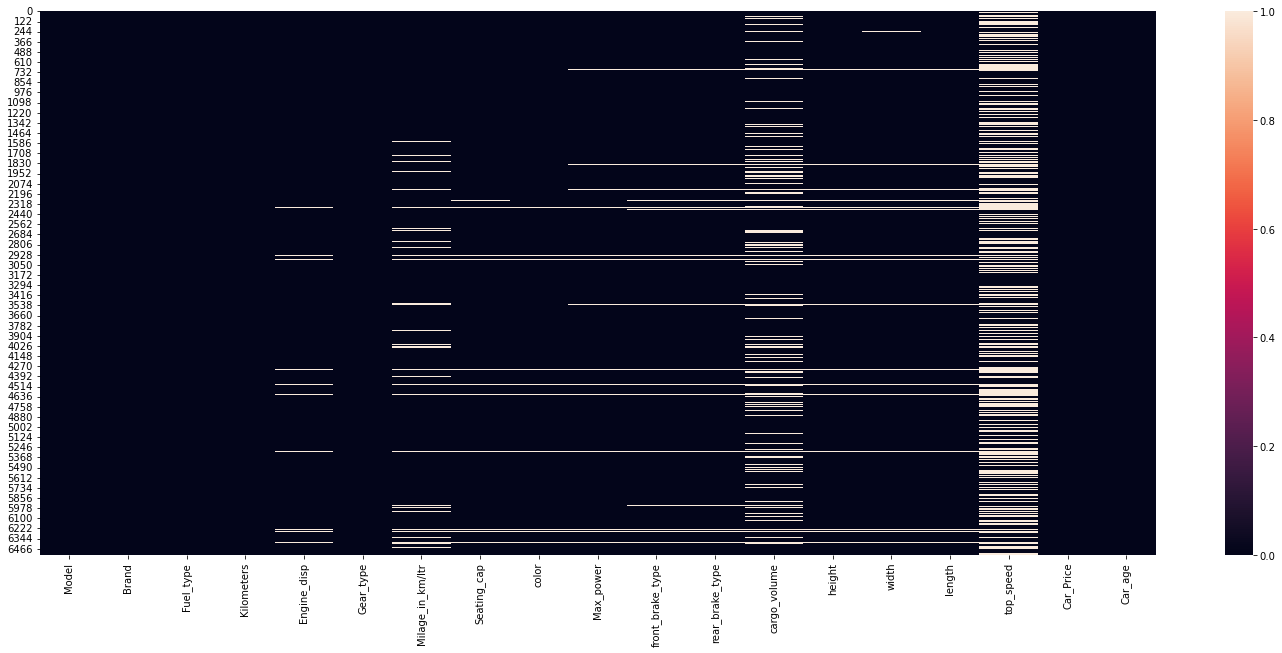

In [47]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull())

In [37]:
# Checking mean value of the column "length"
print("The mean value of 'length' is:",df["length"].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "Weight" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'carge_valume' is:",df["cargo_volume"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4197.8718872357085

The median value of 'Engine_disp' is: 1461.0
The median value of 'Milage_in_km/ltr' is: 18.5
The median value of 'Max_power' is: 98.6
The median value of 'height' is: 1523.0
The median value of 'width' is: 1734.0
The median value of 'carge_valume' is: 378.0
The median value of 'top_speed' is: 172.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


In [38]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','cargo_volume','length','width','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [39]:
# Checking for null values after imputing
df.isnull().sum()

Model               0
Brand               0
Fuel_type           0
Kilometers          0
Engine_disp         0
Gear_type           0
Milage_in_km/ltr    0
Seating_cap         0
color               0
Max_power           0
front_brake_type    0
rear_brake_type     0
cargo_volume        0
height              0
width               0
length              0
top_speed           0
Car_Price           0
Car_age             0
dtype: int64

<AxesSubplot:>

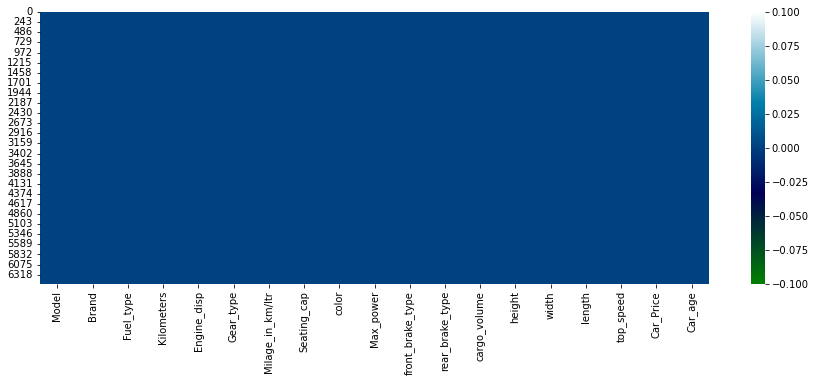

In [51]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")

In [40]:
# Let us check any duplicate data is available,
df.duplicated().sum()

313

In [41]:
df.drop_duplicates(inplace=True)

In [54]:
# Let's check the dataframe after cleaning 
df.head()

Model    Brand Fuel_type  Kilometers  Engine_disp  Gear_type  \
0   RediGO   Datsun    Petrol     23840.0        799.0     Manual   
1    Camry   Toyota    Petrol     60343.0       2494.0  Automatic   
2   Baleno   Maruti    Petrol     38155.0       1197.0     Manual   
3    Verna  Hyundai    Petrol     54282.0       1591.0     Manual   
4  Compass     Jeep    Diesel     58463.0       1956.0     Manual   

   Milage_in_km/ltr  Seating_cap       color  Max_power front_brake_type  \
0             20.71          5.0  Opal White      53.64             Disc   
1             12.98          5.0  Grey Metal     178.40  Ventilated Disc   
2             21.40          5.0    Ray blue      83.10             Disc   
3             17.00          5.0       White     121.30             Disc   
4             17.10          5.0  Exotic Red     173.00             Disc   

  rear_brake_type  cargo_volume  height   width  length  top_speed  Car_Price  \
0            Drum         222.0  1546.0  1574.0  3435.0      172.0   381000.0   
1            Disc         436.0  1480.0  1825.0  4850.0      210.0  1666000.0   
2            Drum         339.0  1510.0  1745.0  3995.0      180.0   633000.0   
3            Drum         480.0  1475.0  1729.0  4440.0      172.0  1014000.0   
4            Disc         408.0  1640.0  1818.0  4395.0      172.0  1230000.0   

   Car_age  
0      2.0  
1      6.0  
2      5.0  
3      4.0  
4      5.0

In [42]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (6228, 19)


In [56]:
# Statistical summary of dataset
df.describe()

Kilometers  Engine_disp  Milage_in_km/ltr  Seating_cap    Max_power  \
count  6.228000e+03  6228.000000       6228.000000  6228.000000  6228.000000   
mean   5.381270e+04  1534.762524         18.658576     5.250482   112.825148   
std    7.430865e+04   546.752326          4.087927     0.737102    50.999380   
min    1.900000e+02     0.000000          7.080000     2.000000    25.500000   
25%    2.868650e+04  1197.000000         16.200000     5.000000    81.830000   
50%    4.900000e+04  1461.000000         18.500000     5.000000    98.600000   
75%    7.043175e+04  1798.000000         20.920000     5.000000   130.000000   
max    3.990000e+06  6749.000000        120.000000    10.000000   603.000000   

        cargo_volume       height        width       length    top_speed  \
count    6228.000000  6228.000000  6228.000000  6228.000000  6228.000000   
mean      432.073572  1573.730250  1748.644027  4198.083760   176.638247   
std      2874.850365   118.891237   133.164851   409.550754    22.858261   
min        73.000000  1249.000000  1410.000000  3099.000000    81.000000   
25%       296.000000  1485.000000  1690.000000  3955.000000   169.000000   
50%       378.000000  1523.000000  1734.000000  4197.871887   172.000000   
75%       465.000000  1642.000000  1811.000000  4490.000000   180.000000   
max    160680.000000  1995.000000  2220.000000  5982.000000   313.000000   

          Car_Price      Car_age  
count  6.228000e+03  6228.000000  
mean   1.075798e+06     6.266699  
std    1.395248e+06     3.456166  
min    3.000000e+04     0.000000  
25%    4.230000e+05     4.000000  
50%    6.500000e+05     6.000000  
75%    1.150000e+06     8.000000  
max    2.260000e+07    23.000000

The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.
From the above description we can observe the following things

•	The counts of every column is same which means there are no missing values present in the dataset as we are already treated them.

•	The min value for "Engine_disp", "Milage_in_km/ltr" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "Weight", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.


•	The mean value is greater than the median(50%) in the columns such as "Engine_disp", "Max_power", "length", "Weight", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right.

•	In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.


•	We need to remove these outliers and skewness except target column using appropriate methodsbefore building our machine learning models.


### Separating numerical and categorical columns

In [43]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_type', 'color', 'front_brake_type', 'rear_brake_type']

Numerical columns present in the dataset are:
 ['Kilometers', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'cargo_volume', 'height', 'width', 'length', 'top_speed', 'Car_Price', 'Car_age']


### Data Visualization

#### Univariate Analysis

##### Plotting categorical Variables

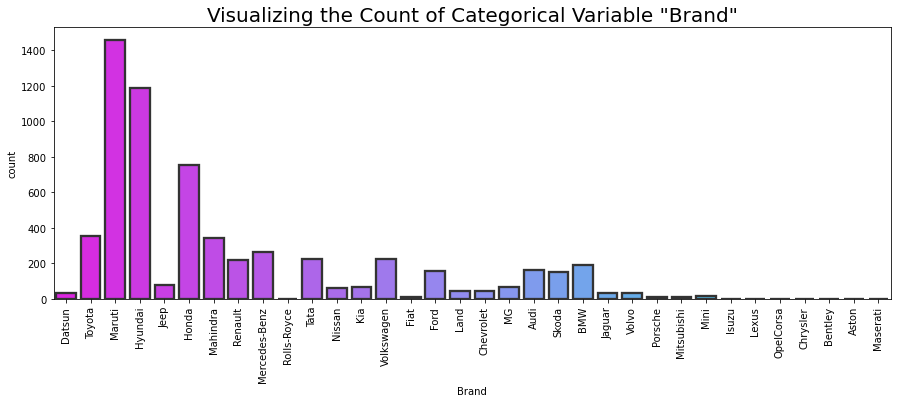

In [59]:
# Plotting count plot for categorical variable "Brand" of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = "cool_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

The above count plot gives the count of cars' brand. From the graph we can conclude that we are having most of the cars from Maruti and Hyundai brand as the count is high for these brands.

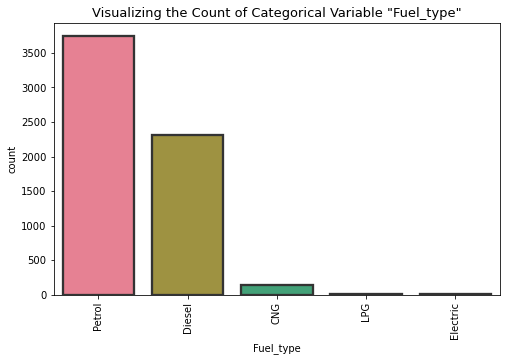

In [60]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="husl", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

The above plot gives the count of fuel types used by the cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

Manual       4105
Automatic    2123
Name: Gear_type, dtype: int64


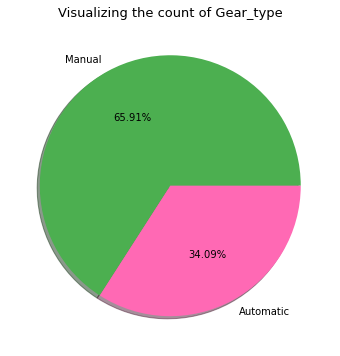

In [62]:
# Visualizing the count of Gear_transmission of the car 
print(df["Gear_type"].value_counts())
labels='Manual','Automatic'
colors = ["#4CAF50", "hotpink"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_type",fontsize=13)
plt.show()

The above plot gives the count of transmission, from this graph we can notice that around 66% of the cars are with Manual gear transmission system and only 34% of the cars are with Automatic gear transmission system.

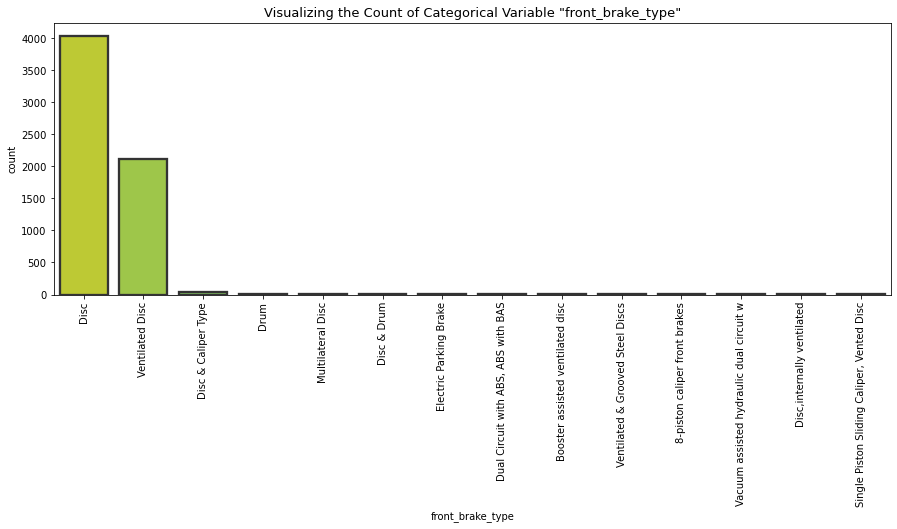

In [63]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="viridis_r", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types

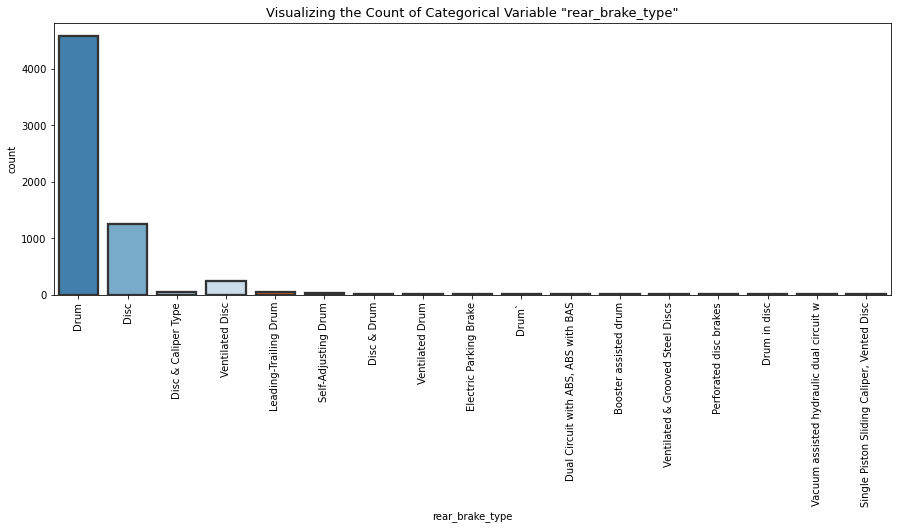

In [64]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 10000 compared to other type of rear brakes.

#### Distribution of skewness

#### Plotting Numerical Variables

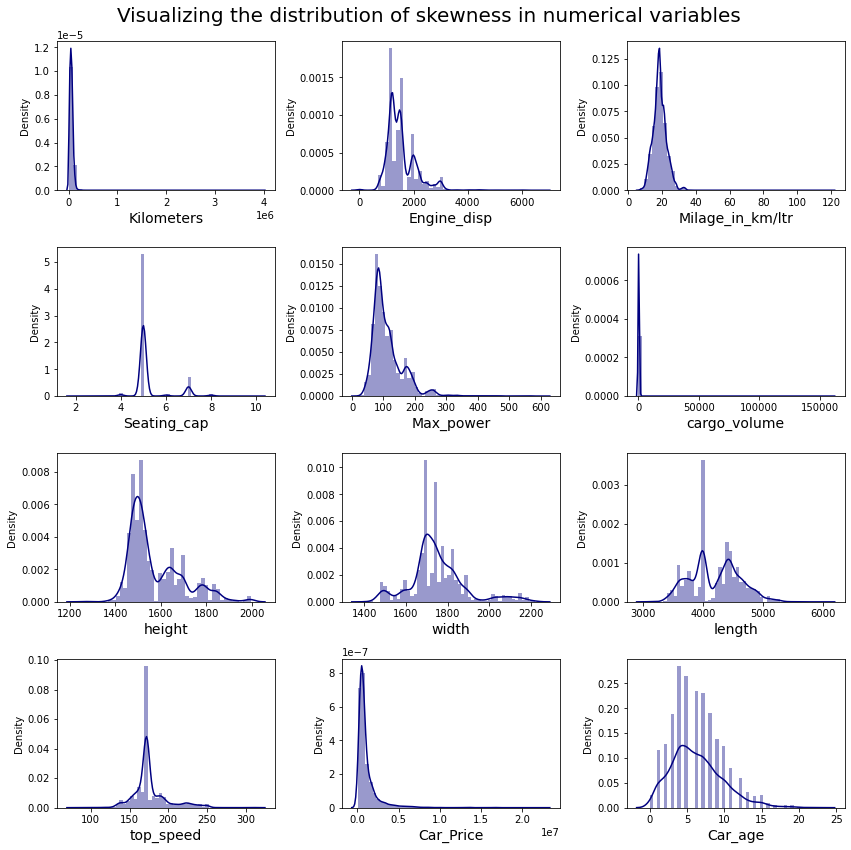

In [65]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Observations:

Above plot shows how the data has been distributed in each of the columns.

From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.

Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "Weight", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).

The data in the column "height" skewed to left since the mean values is less than the median.

We need to remove this skewness before building our machine learning models.

#### Bivariate Analysis

#### Visualizing Categorical Variables vs Selling_Price

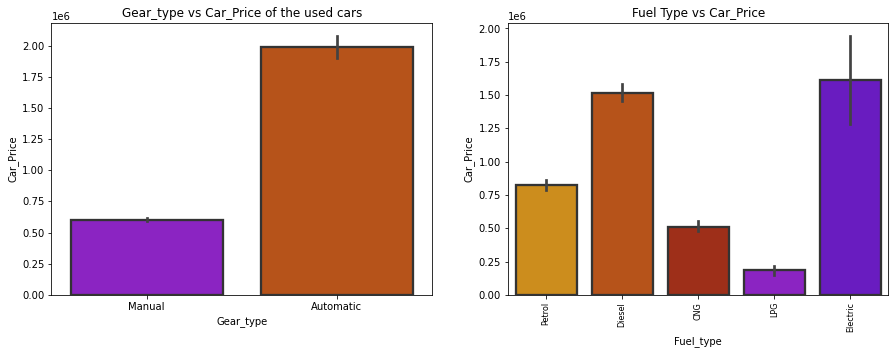

In [66]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_type'],df['Car_Price'],palette="gnuplot", linewidth=2.3, edgecolor=".2");
plt.title('Gear_type vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Fuel_type'],df['Car_Price'],palette="gnuplot_r", linewidth=2.3, edgecolor=".2");
plt.title('Fuel Type vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Gear_type:** From the bar plot we can observe that the cars which have Automatic gear  system are having high price compared to the cars which have Manual gear  system.
- **Car_Price vs Fuel Type** From the second plot we came to know that the Electric and deisel cars have higher price compared to other models

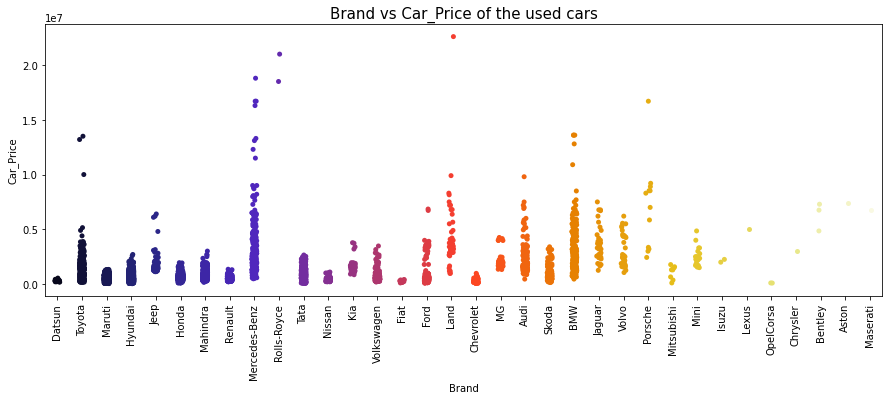

In [67]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Mercedes_Benz and BMW brand have high price compared to other brands.

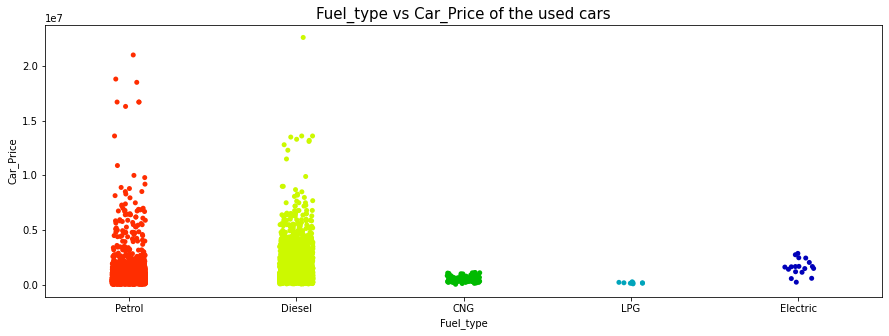

In [68]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_Price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_Price of the used cars',fontsize=15)
plt.show()

From the graph we can conclude that more number of cars are using Petrol and Diesel fuels and these cars have wide range of price from minimum to maximum. And very few of the cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.

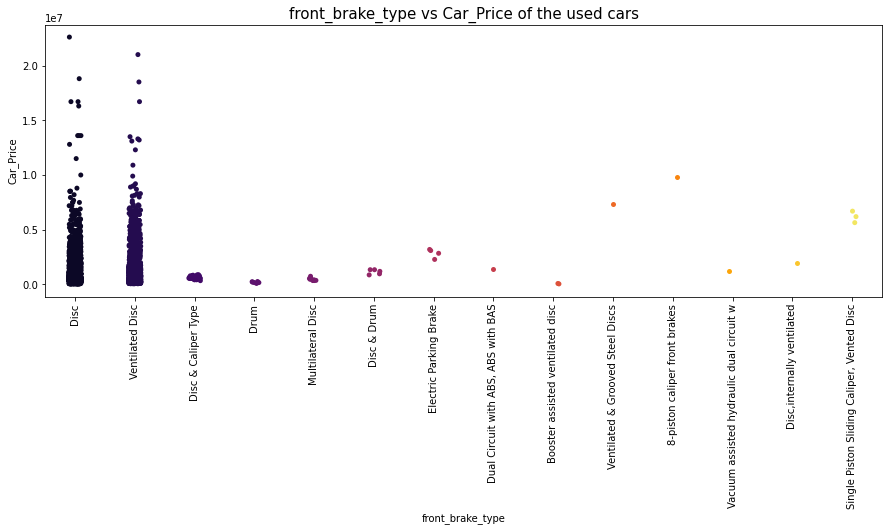

In [69]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

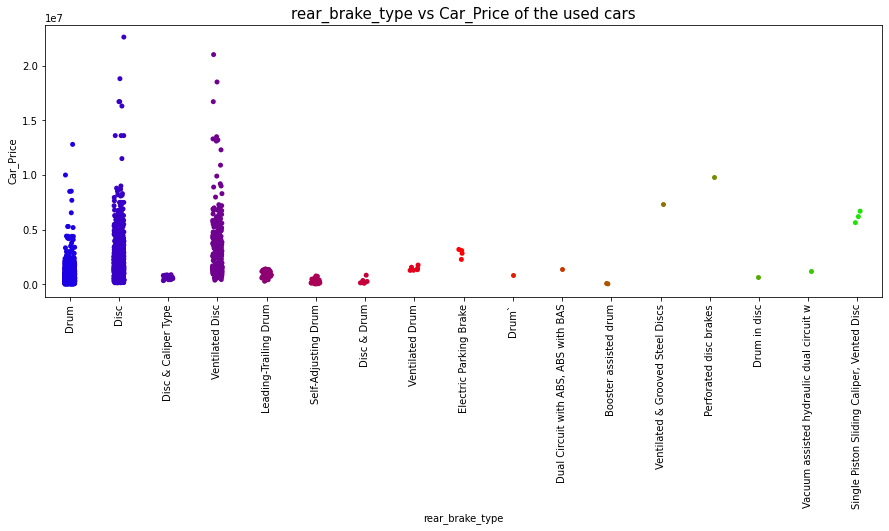

In [70]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc or Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.

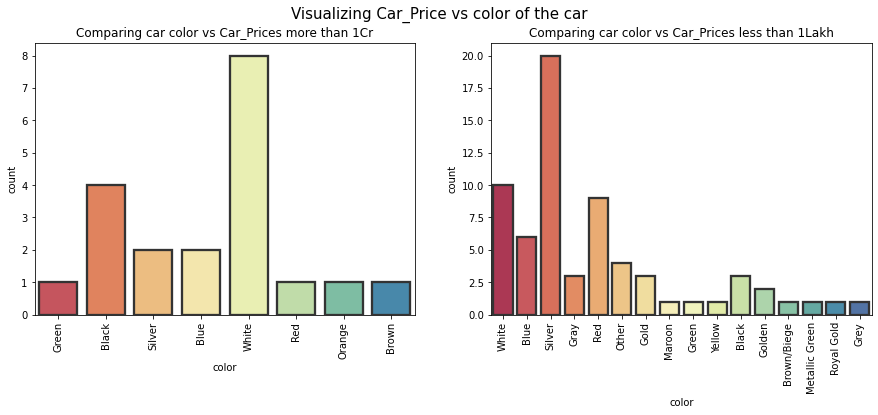

In [71]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. The white color cars are more expensive compared to the cars with other colors.

The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price.

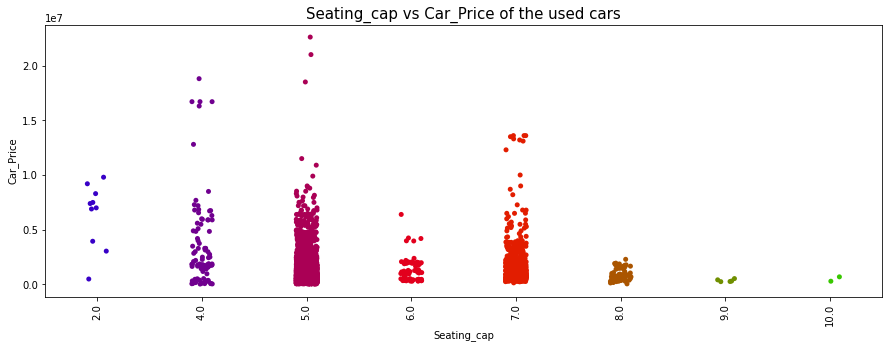

In [72]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars. And only 3 cars are observed with the seating capacity of 10.

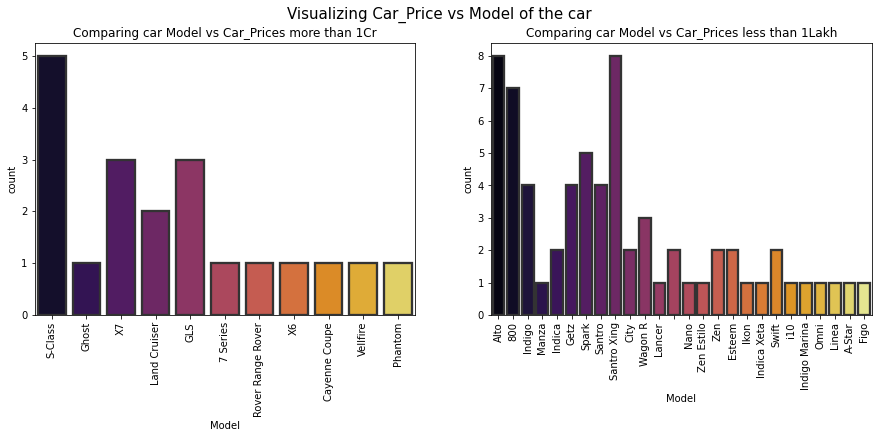

In [73]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The Rover Range Sport model are expensive compared to other models.

The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model Alto have very less price.

#### Visualizing Numerical Variables vs Car_Price

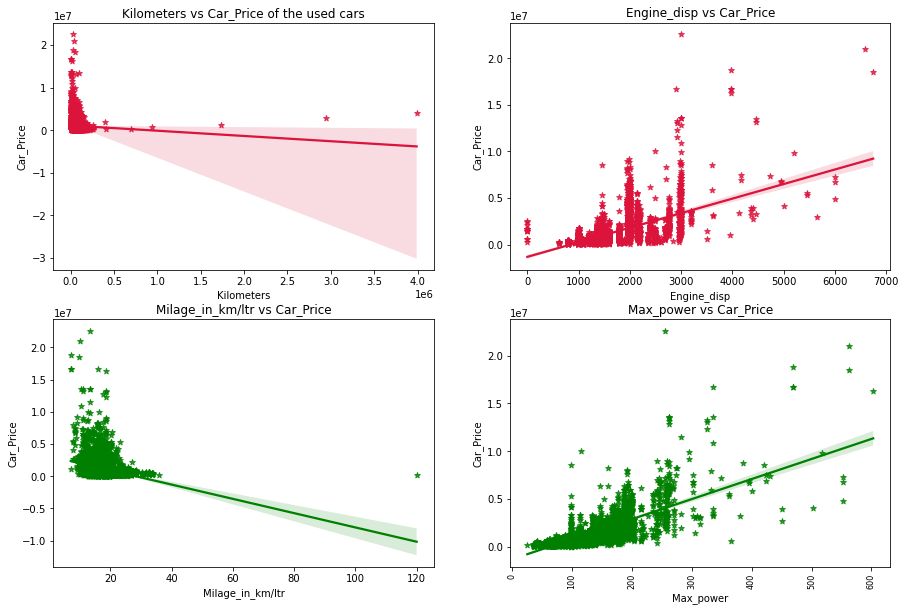

In [75]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Kilometers' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Kilometers'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Kilometers vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],marker="*",color='crimson')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],marker="*",color='g')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],marker="*",color='g')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs Kilometers:** From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.
- **Car_Price vs Engine_disp:** There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.
- **Car_Price vs Milage_in_km/ltr:** The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price nad milage also some used cars have 0 milage which is unrealistic.
- **Car_Price vs Max_power:** Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

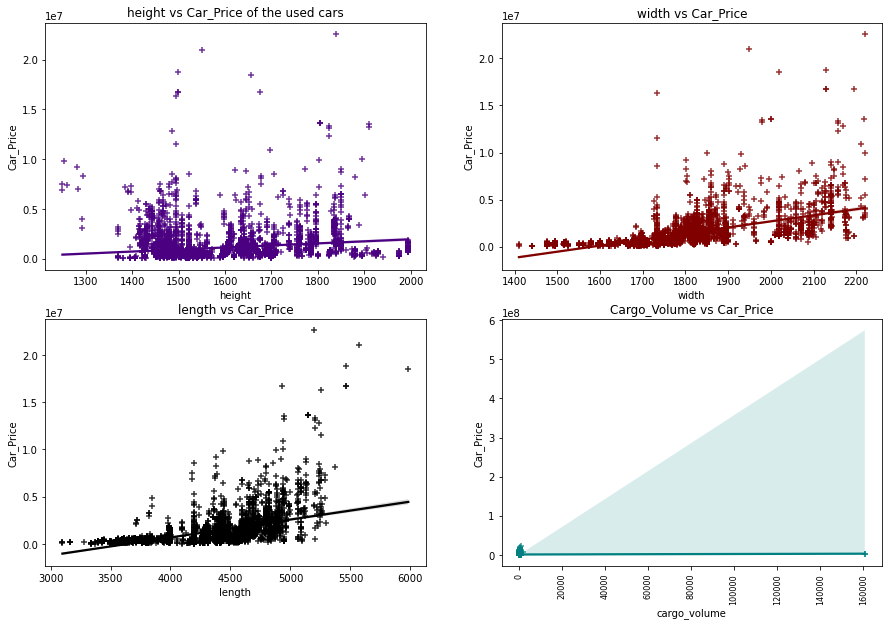

In [76]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],marker="+",color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],marker="+",color='maroon')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],marker="+",color='k')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'cargo_volume' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['cargo_volume'],y= df['Car_Price'],marker="+",color='teal')
plt.title('Cargo_Volume vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
- **Car_Price vs height:** From the graph it is clear that the car price is not strongly related with the height of the car, we can say the cars having height in the range of 1300 mm to 1800 mm have somewhat high price.
- **Car_Price vs width:** The graph shows there is some positive linear relation between car price and width of the car, so the cars having width in the range of 1700mm to 2200mm have high price. So we can conclude as the width of the car increases, the price of the car also goes on increasing.
- **Car_Price vs length:** There is some positive linear relation between car price and length of the cars. As the length of the cars increases, the price of the cars also increases. The cars that are having the length above 4250mm have high price.
- **Car_Price vs Cargo Valume:** There is some positive linear relation between price of the car and Cargo_Volume.

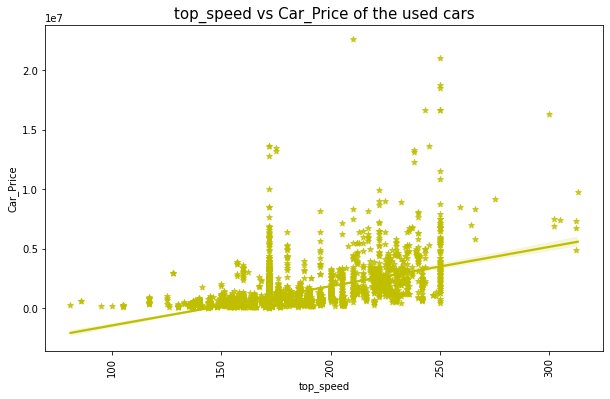

In [77]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],marker="*",color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 120 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases.

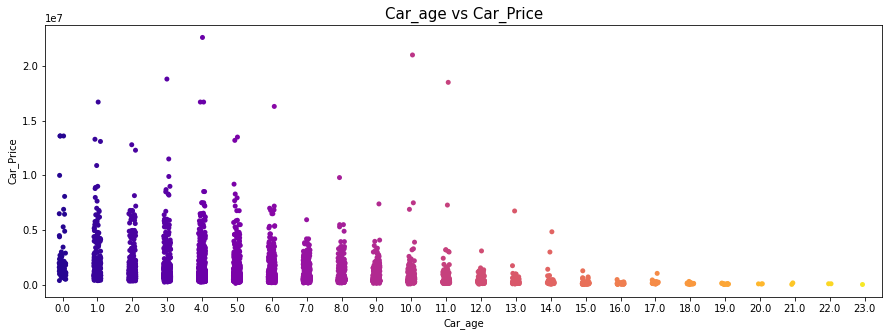

In [78]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.

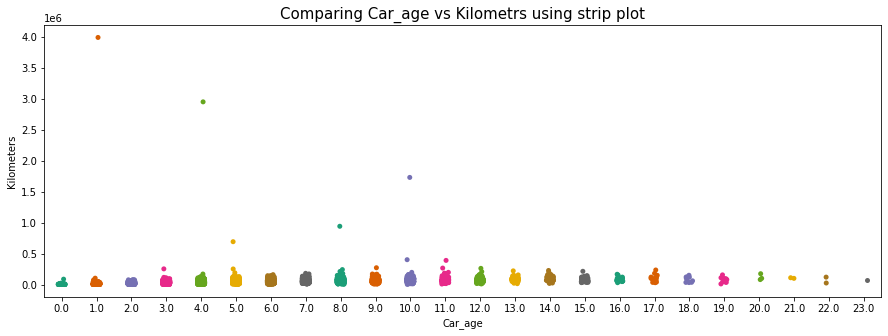

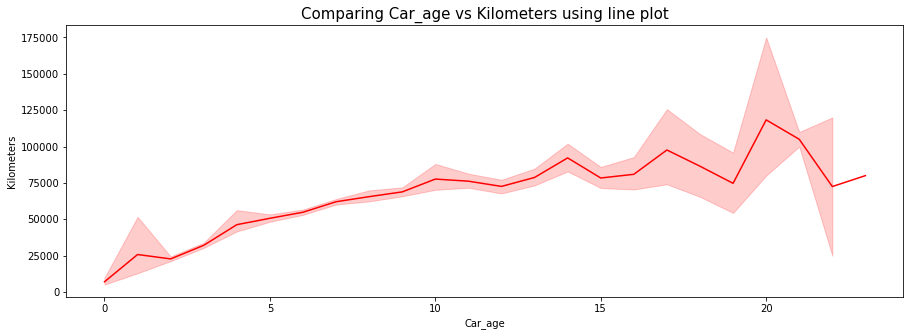

In [79]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Kilometers', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Kilometrs using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Kilometers', data = df, color = "r")
plt.title("Comparing Car_age vs Kilometers using line plot",fontsize=15)
plt.show()
plt.show()

The above two graphs represents car_age vs Running in kms. The cars which have their age from 2 years to 16 years have highly used. That is the running kms for these cars are around 50k kms.

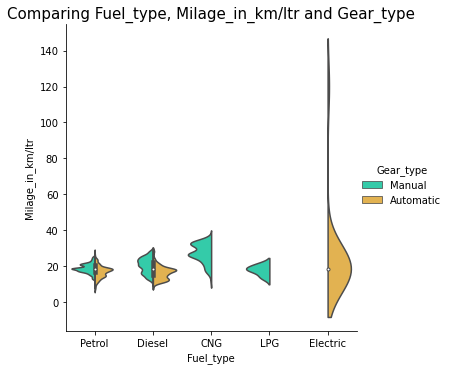

In [80]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_type", kind="violin", split=True, palette="turbo", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_type",fontsize=15)
plt.show()

The above violin plot gives the relation between Milage in km/ltr and Fuel type on the basis of gear transmission. As we can observe the cars with Manual gear transmission which are using CNG as a fuel are having good milage compared to other fuel types.

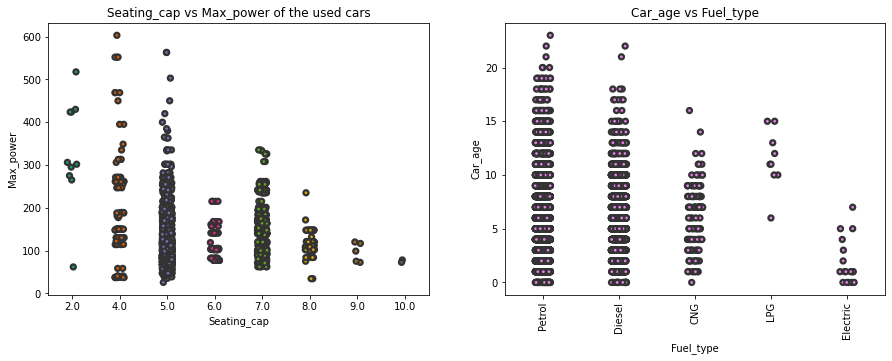

In [81]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

### Observations:
- **Seating_cap vs Max_power:** The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.
- **Fuel_type vs Car_age:** The cars which are using Patrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel.

#### Multivariate Analysis

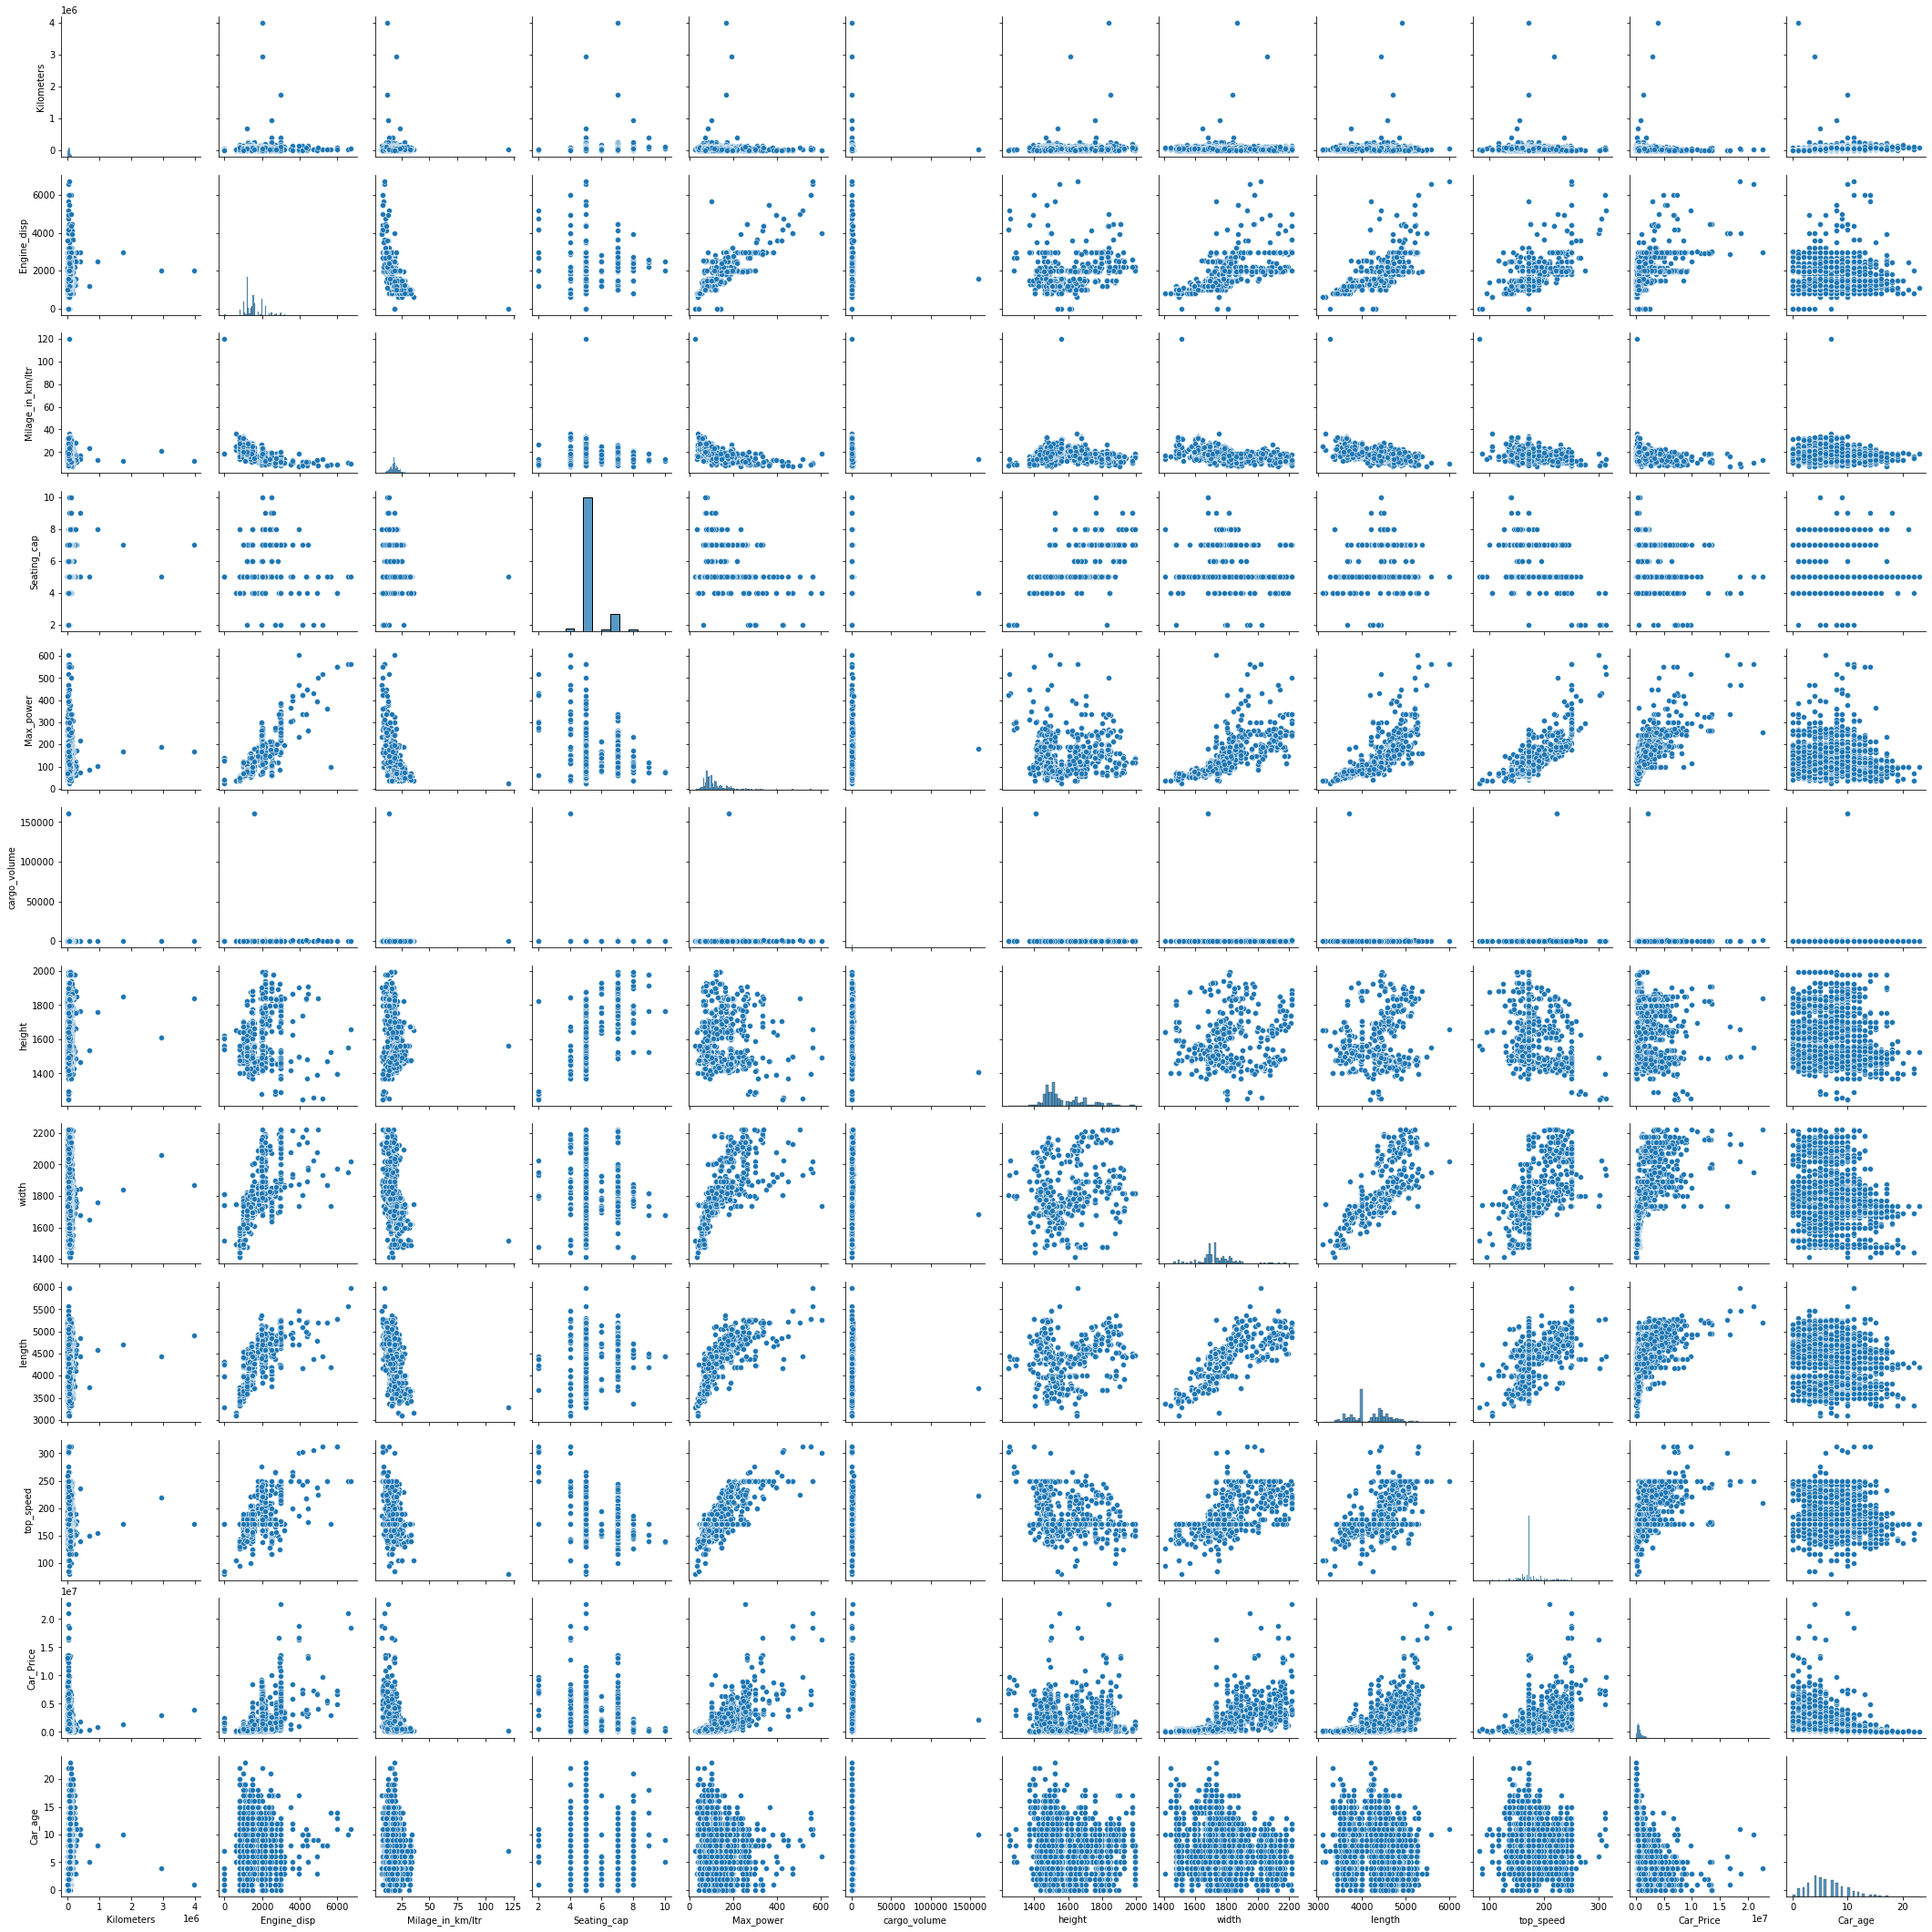

In [83]:
sns.pairplot(df,palette="husl")
plt.show()

- The pairplot gives the pairwise relation between the features on the basis of the target "Car_Price". On the diagonal we can notice the distribution plots.
- From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
- We can also find some outliers present in the data, we will remove them using appropriate methods.

### Outliers

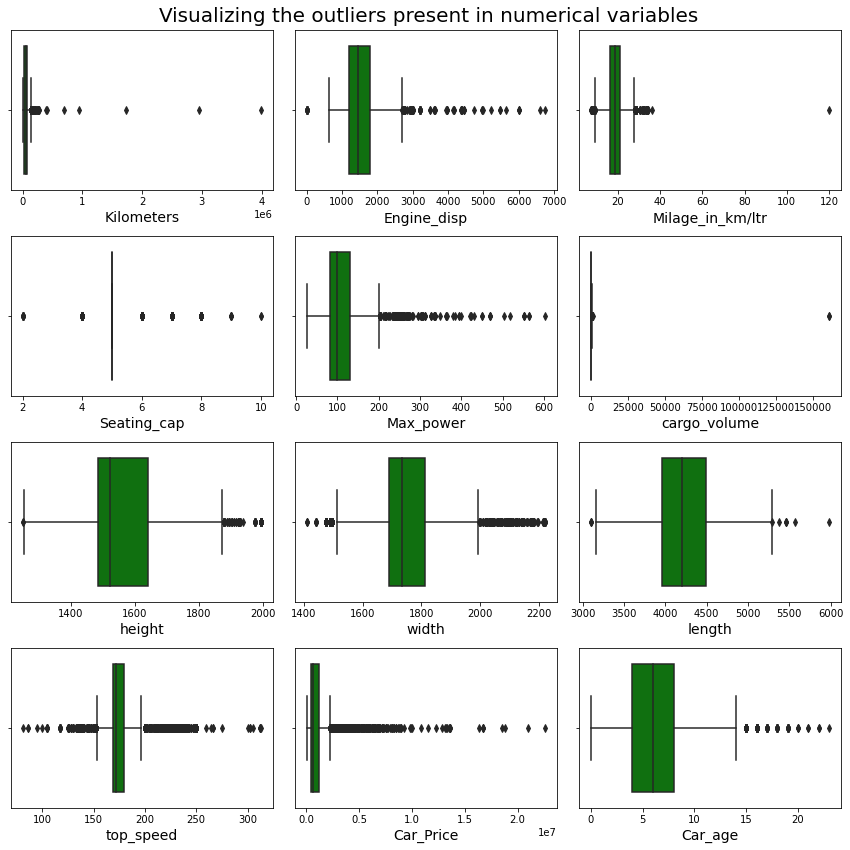

In [85]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

- From the above box plots we can observe all the columns contains the outliers. 
- Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

#### Removing outliers using Zscore

In [44]:
# Features containing outliers
df1= df[['Kilometers','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','cargo_volume','height','width','length','top_speed','Car_age']]

In [45]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df1=df[(z<3).all(axis=1)]

In [46]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", df.shape)
print("Shape of train dataset after removing outliers:", new_df1.shape)

Shape of train dataset before removing outliers: (6228, 19)
Shape of train dataset after removing outliers: (5812, 19)


In [47]:
# Let's check the the data loss
data_loss = (6228-5812)/6228*100
data_loss

6.679511881824022

By using Zscore I am losing around 6.6% of data which is acceptable as the acceptable range of data loss is less than 10. 

In [48]:
df=new_df1.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [49]:
# Checking the skewness
df.skew()

Kilometers          0.999538
Engine_disp         1.118811
Milage_in_km/ltr    0.228157
Seating_cap         2.394958
Max_power           1.115299
cargo_volume        0.233796
height              1.100774
width               0.666614
length              0.083777
top_speed           1.057307
Car_Price           3.643416
Car_age             0.527239
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr","width", "length", and "Car_age". Let's remove skewness in the remaining columns.

#### Removing skewness using yeo-johnson method

In [50]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ['Kilometers',"Engine_disp","Seating_cap","cargo_volume","Max_power","height","top_speed",'width']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [51]:
df[skew1] = scaler.fit_transform(df[skew1].values)
df[skew1].head()

Kilometers  Engine_disp  Seating_cap  cargo_volume  Max_power    height  \
0   -0.872305    -1.724926    -0.235404     -1.374067  -2.036401 -0.056922   
1    0.421699     2.119764    -0.235404      0.513877   1.551001 -0.876594   
2   -0.294186    -0.617202    -0.235404     -0.311394  -0.553627 -0.478142   
3    0.241050     0.318840    -0.235404      0.875790   0.558784 -0.944900   
4    0.366646     1.092943    -0.235404      0.279798   1.476810  0.842441   

   top_speed     width  
0  -0.075022 -1.469922  
1   1.599256  0.745641  
2   0.338703  0.110679  
3  -0.075022 -0.023577  
4  -0.075022  0.692378

In [52]:
# Checking skewness after using yeo-johnson method
df[skew1].skew()

Kilometers     -0.034054
Engine_disp     0.336054
Seating_cap    -1.002681
cargo_volume    0.013619
Max_power       0.011931
height          0.544494
top_speed      -0.063126
width          -0.029345
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap". In this column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is. 

### Encoding the categorical columns using Label Encoder Method

In [53]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [54]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

Model  Brand  Fuel_type  Gear_type  color  front_brake_type  \
0    156      3          4          1    161                 1   
1     48     26          4          0    107                 8   
2     36     16          4          1    210                 1   
3    206      7          4          1    282                 1   
4     59     10          1          1     79                 1   

   rear_brake_type  
0                4  
1                1  
2                4  
3                4  
4                1

### Correlation

In [55]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Model     Brand  Fuel_type  Kilometers  Engine_disp  \
Model             1.000000  0.111140  -0.029081    0.025624    -0.088616   
Brand             0.111140  1.000000  -0.076798    0.003491     0.054247   
Fuel_type        -0.029081 -0.076798   1.000000   -0.313697    -0.461997   
Kilometers        0.025624  0.003491  -0.313697    1.000000     0.170103   
Engine_disp      -0.088616  0.054247  -0.461997    0.170103     1.000000   
Gear_type         0.122040  0.007600   0.090412    0.160966    -0.375618   
Milage_in_km/ltr  0.044626 -0.024304  -0.154787    0.007030    -0.576453   
Seating_cap       0.053189  0.170534  -0.239784    0.136045     0.295976   
color             0.026352 -0.040706  -0.040665    0.051180     0.028250   
Max_power        -0.086810 -0.061427  -0.310655   -0.009166     0.813594   
front_brake_type -0.006984  0.049055  -0.089380    0.184545     0.083362   
rear_brake_type  -0.042266 -0.052607   0.010213    0.067063    -0.050373   
cargo_volume     -0.101125 -0.060483  -0.183550    0.083099     0.484589   
height            0.240130  0.145472  -0.279114   -0.007932     0.304358   
width            -0.025190  0.001878  -0.405681   -0.012904     0.708215   
length           -0.160737  0.053470  -0.363655    0.078105     0.798433   
top_speed        -0.101701 -0.146883  -0.182017   -0.001081     0.523124   
Car_Price        -0.097993  0.013858  -0.287229   -0.257243     0.543781   
Car_age           0.027245 -0.093150  -0.023317    0.593283     0.029692   

                  Gear_type  Milage_in_km/ltr  Seating_cap     color  \
Model              0.122040          0.044626     0.053189  0.026352   
Brand              0.007600         -0.024304     0.170534 -0.040706   
Fuel_type          0.090412         -0.154787    -0.239784 -0.040665   
Kilometers         0.160966          0.007030     0.136045  0.051180   
Engine_disp       -0.375618         -0.576453     0.295976  0.028250   
Gear_type          1.000000          0.344739     0.030470  0.023146   
Milage_in_km/ltr   0.344739          1.000000    -0.208312 -0.044009   
Seating_cap        0.030470         -0.208312     1.000000  0.048926   
color              0.023146         -0.044009     0.048926  1.000000   
Max_power         -0.510408         -0.614440     0.159203 -0.000613   
front_brake_type   0.024040          0.029517     0.059845 -0.018705   
rear_brake_type    0.065666          0.090846     0.028189 -0.039728   
cargo_volume      -0.277179         -0.336570    -0.062811 -0.012270   
height            -0.035939         -0.230442     0.444368  0.030391   
width             -0.421702         -0.458038     0.175600 -0.007114   
length            -0.413714         -0.540468     0.278957 -0.006014   
top_speed         -0.410986         -0.334559    -0.066616 -0.039710   
Car_Price         -0.515687         -0.328360     0.091914  0.000334   
Car_age            0.191309         -0.108522    -0.015702  0.008879   

                  Max_power  front_brake_type  rear_brake_type  cargo_volume  \
Model             -0.086810         -0.006984        -0.042266     -0.101125   
Brand             -0.061427          0.049055        -0.052607     -0.060483   
Fuel_type         -0.310655         -0.089380         0.010213     -0.183550   
Kilometers        -0.009166          0.184545         0.067063      0.083099   
Engine_disp        0.813594          0.083362        -0.050373      0.484589   
Gear_type         -0.510408          0.024040         0.065666     -0.277179   
Milage_in_km/ltr  -0.614440          0.029517         0.090846     -0.336570   
Seating_cap        0.159203          0.059845         0.028189     -0.062811   
color             -0.000613         -0.018705        -0.039728     -0.012270   
Max_power          1.000000         -0.018868        -0.138061      0.562413   
front_brake_type  -0.018868          1.000000         0.258366      0.011968   
rear_brake_type   -0.138061          0.258366         1.000000     -0.107337   
cargo_volume       

The above method gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

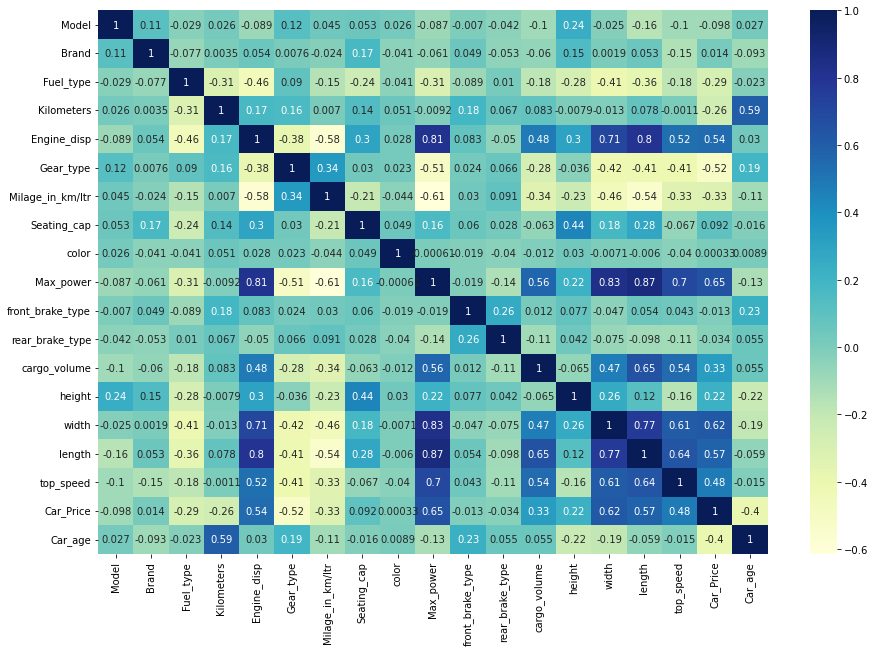

In [56]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.
- From the heat map we can notice that the dark shades are highly positively correlated and light shades are highly negatively correlated with the target variable.
- The o columns like "Gear_type", "Car_age", "rear_brake_type", "Fuel_type", "Milage_in_km" etc are highly negatively correlated with the target variable "Car_Price".
- We can observe from the map that most of the columns are highly correlated with each other which leads to multicollinearity problem.So, we will check the VIF value and remove the columns having high VIF value to overcome with this multicollinearity problem.

In [57]:
# Checking the positive and negative relation between label and features 
cor['Car_Price'].sort_values(ascending=False)

Car_Price           1.000000
Max_power           0.649985
width               0.619121
length              0.571269
Engine_disp         0.543781
top_speed           0.476953
cargo_volume        0.326077
height              0.218643
Seating_cap         0.091914
Brand               0.013858
color               0.000334
front_brake_type   -0.013290
rear_brake_type    -0.033919
Model              -0.097993
Kilometers         -0.257243
Fuel_type          -0.287229
Milage_in_km/ltr   -0.328360
Car_age            -0.395628
Gear_type          -0.515687
Name: Car_Price, dtype: float64

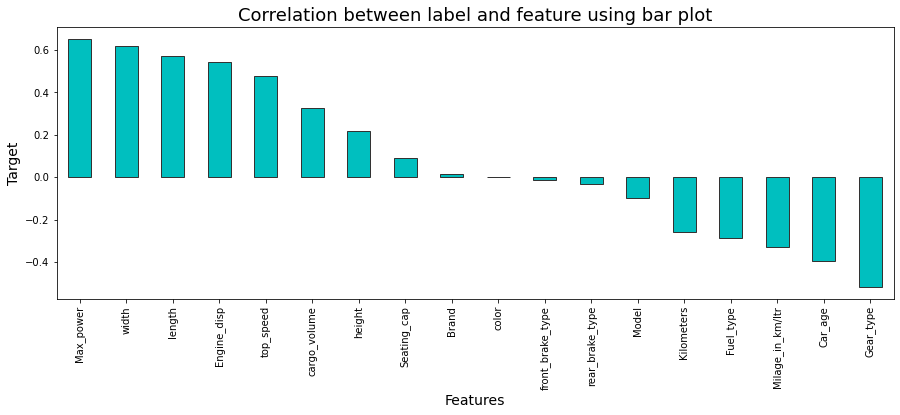

In [59]:
plt.figure(figsize=(15,5))
df.corr()['Car_Price'].sort_values(ascending=False).drop(['Car_Price']).plot(kind='bar',color='c',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "color" is less correlated with the label compared to others, we can drop this columns if necessary but for now let's keep it as it is.

#### Separating the independent and target variables into x and y

In [61]:
x = df.drop("Car_Price", axis=1)
y = df["Car_Price"]

In [62]:
# Dimension of x and y
x.shape, y.shape

((5812, 18), (5812,))

#### Scaling data with standard scaler

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Model     Brand  Fuel_type  Kilometers  Engine_disp  Gear_type  \
0  0.488180 -1.362167   0.769904   -0.872305    -1.724926   0.702367   
1 -1.021752  1.658153   0.769904    0.421699     2.119764  -1.423757   
2 -1.189522  0.344970   0.769904   -0.294186    -0.617202   0.702367   
3  1.187222 -0.836894   0.769904    0.241050     0.318840   0.702367   
4 -0.867963 -0.442939  -1.267128    0.366646     1.092943   0.702367   

   Milage_in_km/ltr  Seating_cap     color  Max_power  front_brake_type  \
0          0.537869    -0.235404 -0.232599  -2.036401         -0.715782   
1         -1.631036    -0.235404 -0.792172   1.551001          1.406576   
2          0.731472    -0.235404  0.275162  -0.553627         -0.715782   
3         -0.503093    -0.235404  1.021259   0.558784         -0.715782   
4         -0.475035    -0.235404 -1.082321   1.476810         -0.715782   

   rear_brake_type  cargo_volume    height     width    length  top_speed  \
0         0.145884     -1.374067 -0.050694 -1.469922 -1.909396  -0.075022   
1        -1.361010      0.513877 -0.870382  0.745641  1.742274   1.599256   
2         0.145884     -0.311394 -0.471923  0.110679 -0.464212   0.338703   
3         0.145884      0.875790 -0.938689 -0.023577  0.684193  -0.075022   
4        -1.361010      0.279798  0.848686  0.692378  0.568062  -0.075022   

    Car_age  
0 -1.265612  
1 -0.047270  
2 -0.351856  
3 -0.656441  
4 -0.351856

We have scaled the data using StandardScaler method to overcome with the issue of data biasness and displayed the data of independent variables after scaling.

### Checking Variance Inflation Factor (VIF)

In [64]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values          Features
0     1.174128             Model
1     1.185797             Brand
2     2.469933         Fuel_type
3     1.855158        Kilometers
4     4.721646       Engine_disp
5     1.471615         Gear_type
6     3.153455  Milage_in_km/ltr
7     1.682866       Seating_cap
8     1.023254             color
9     9.948663         Max_power
10    1.230766  front_brake_type
11    1.132705   rear_brake_type
12    2.090176      cargo_volume
13    2.175796            height
14    3.954995             width
15    7.832349            length
16    2.735651         top_speed
17    2.171823           Car_age

From this we can notice that there no that much multicolinearity problems as all VIf scores were below 10, So we acn proceed further

## Modeling

#### Finding the Best Random State and Accuracy

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9518797549111727  on Random_state  41


Here we are getting accuracy score of 95.18% with Random state 41

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Feature Importance

In [68]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                    
Max_power              0.554
Car_age                0.148
width                  0.073
length                 0.058
Kilometers             0.030
height                 0.023
Gear_type              0.022
Model                  0.021
cargo_volume           0.016
top_speed              0.014
Brand                  0.011
Engine_disp            0.009
Milage_in_km/ltr       0.008
color                  0.004
rear_brake_type        0.004
Fuel_type              0.002
front_brake_type       0.002
Seating_cap            0.001

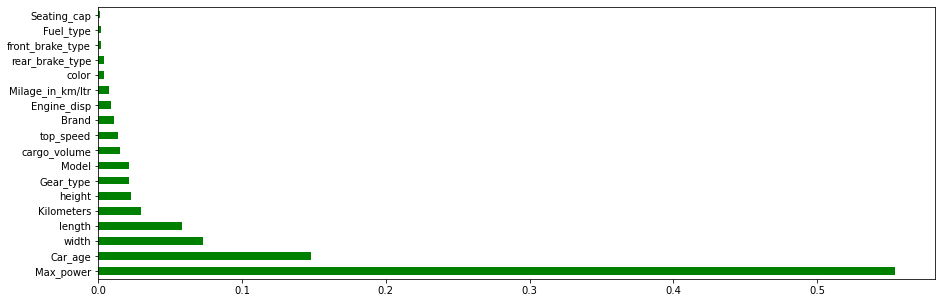

In [69]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="g")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Max_power"contributing more for prediction which means this feature is important for the predictions

## Decision Tree Regressor

R2_Score: 90.89607591187672
Mean Absolute Error: 138169.3004587156
Mean Squared Error: 80766315334.74771
Root Mean Squared Error: 284194.1507750427

Cross Validation Score: 80.6505323702537

R2 Score - Cross Validation Score is 10.245543541623022


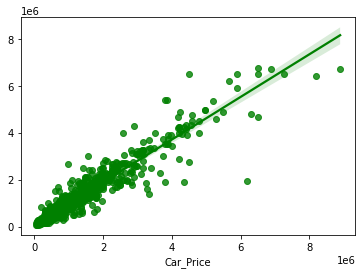

In [70]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

## Random Forest Regressor

R2_Score: 95.44409272909672
Mean Absolute Error: 102295.2719072193
Mean Squared Error: 40418158116.858536
Root Mean Squared Error: 201042.67735199543

Cross Validation Score: 91.28340719626162

R2 Score - Cross Validation Score is 4.160685532835103


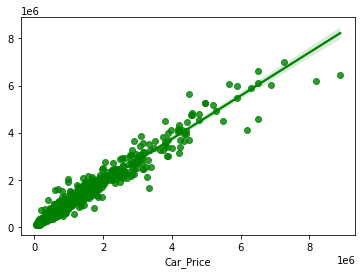

In [71]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="g")
plt.show()

## Extra Trees Regressor

R2_Score: 95.40252744787774
Mean Absolute Error: 101174.9523853211
Mean Squared Error: 40786908402.714745
Root Mean Squared Error: 201957.6896350192

Cross Validation Score: 93.01422636996945

R2 Score - Cross Validation Score is 2.388301077908295


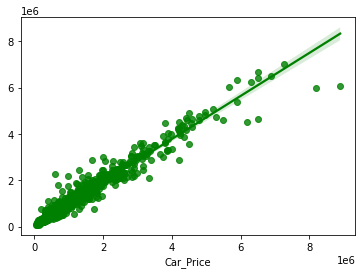

In [72]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="g")
plt.show()

## GradientBoosting Regressor

R2_Score: 93.57237313626595
Mean Absolute Error: 128201.65242252694
Mean Squared Error: 57023293813.23477
Root Mean Squared Error: 238795.50626683654

Cross Validation Score: 90.61517154118917

R2 Score - Cross Validation Score is 2.957201595076782


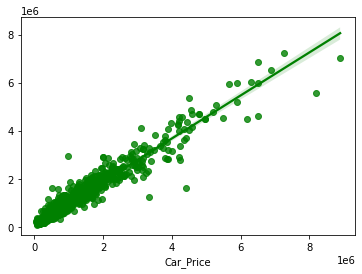

In [73]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="g")
plt.show()

## Extreme Gradient Boosting Regressor (XGB)

R2_Score: 94.68977388397674
Mean Absolute Error: 105672.93258582999
Mean Squared Error: 47110168410.242096
Root Mean Squared Error: 217048.76965843898

Cross Validation Score: 92.37665068349345

R2 Score - Cross Validation Score is 2.3131232004832896


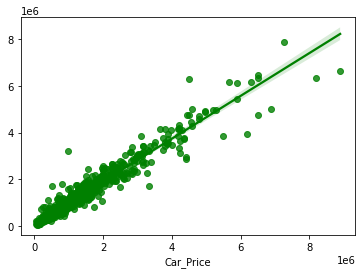

In [74]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="g")
plt.show()

## Bagging Regressor

R2_Score: 94.16072560725641
Mean Absolute Error: 116114.89118883792
Mean Squared Error: 51803669754.41981
Root Mean Squared Error: 227604.1953796542

Cross Validation Score: 89.19844018737584

R2 Score - Cross Validation Score is 4.962285419880573


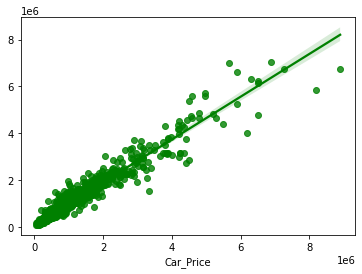

In [75]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="g")
plt.show()

## KNeighbors Regressor

R2_Score: 87.55882550766482
Mean Absolute Error: 157814.22832568808
Mean Squared Error: 110373044904.16745
Root Mean Squared Error: 332224.3893879067

Cross Validation Score: 83.028949128816

R2 Score - Cross Validation Score is 4.529876378848826


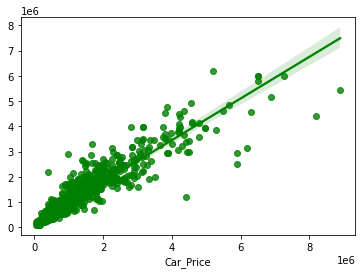

In [76]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="g")
plt.show()

**From the difference between R2 score and Cross Validation score, it can be seen that the XGB Regressor has least difference and low evaluation metrics compared to other models. That is XGBoost as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.**

## Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [79]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [81]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

R2_Score: 95.03147591069765
Mean absolute error: 100677.79236847763
Mean squared error: 44078726872.11816
Root Mean Squared error: 209949.3435858235


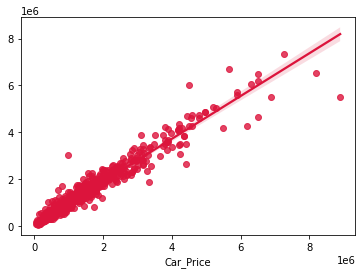

In [82]:
# Creating final model
Car_price_model = xgb(gamma=0.0, learning_rate=0.1, max_depth=6, n_estimators=200)

# Prediction
Car_price_model.fit(x_train, y_train)
pred = Car_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 95.03% which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [83]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"UsedCarPricePrediction.pkl")

['UsedCarPricePrediction.pkl']

#### Loading the saved model and predicting Used Car Price

In [84]:
# Loading the saved model
Model=joblib.load("UsedCarPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 373615.4 ,  266836.5 , 3169001.5 , ..., 2591414.8 ,  209924.02,
       4614107.  ], dtype=float32)

In [85]:
Predicted_Used_Car_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_Used_Car_Price

0         1          2           3           4     \
Predicted  373615.40625  266836.5  3169001.5  310817.875  3471831.75   
Original   400000.00000  230000.0  3050000.0  293000.000  4200000.00   

                   5         6          7            8             9     \
Predicted  284785.78125  884781.5  564509.75  681274.0625  326947.46875   
Original   245000.00000  875000.0  513000.00  680000.0000  275000.00000   

                 10           11          12            13           14    \
Predicted  463514.625  525077.6875  1813779.25   88846.15625  525072.1875   
Original   455000.000  570000.0000  2250000.00  120000.00000  478000.0000   

                15            16          17           18          19    \
Predicted  352155.25  325889.65625  830689.875  861871.0625  909704.625   
Original   325000.00  310000.00000  790000.000  863000.0000  951000.000   

                   20         21            22           23           24    \
Predicted  398964.03125  1330375.0  256984.96875  606317.3125  1011657.125   
Original   425000.00000  1350000.0  285000.00000  600000.0000   885000.000   

                  25           26            27           28         29    \
Predicted  595162.5625  598730.4375  338525.21875  559379.0625  674012.75   
Original   540000.0000  599000.0000  365000.00000  427000.0000  750000.00   

                30            31          32            33           34    \
Predicted  2614310.0  416703.53125  1415602.75  358610.90625   782594.375   
Original   3008000.0  370000.00000  1499000.00  392000.00000  1150000.000   

                 35             36        37            38         39    \
Predicted  595274.625  225680.890625  483558.5  179847.34375  430391.75   
Original   475000.000  240000.000000  410000.0  185000.00000  240000.00   

                  40           41             42           43           44    \
Predicted  864462.0625  563396.0625  130421.234375  395197.3125  535902.1875   
Original   940000.0000  550000.0000  142000.000000  345000.0000  575000.0000   

                  45           46             47             48    \
Predicted  319661.6875  331837.8125  248958.390625  208357.609375   
Original   445000.0000  365000.0000  343000.000000  175000.000000   

                  49           50         51          52           53    \
Predicted  378753.0625  537775.1875  3288383.0  591199.875  694255.0625   
Original   485000.0000  587000.0000  3175000.0  625000.000  770000.0000   

               54          55          56         57         58    \
Predicted  451912.0  584881.875  411921.875  3061344.0  1874701.5   
Original   478000.0  675000.000  375000.000  2775000.0  1835000.0   

                  59          60            61         62           63    \
Predicted  1532764.125  507511.375  353932.21875  1070045.5  548446.3125   
Original   1595000.000  488000.000  420000.00000   989000.0  595000.0000   

                  64           65           66            67         68    \
Predicted  574987.0625  392063.4375  771177.9375  272633.34375  3513830.5   
Original   615000.0000  360000.0000  683000.0000  250000.00000  4250000.0   

                   69           70            71            72           73    \
Predicted  310897.71875  680301.3125  491881.53125  467721.40625  934850.8125   
Original   295000.00000  439000.0000  550000.00000  453000.00000  875000.0000   

                  74            75           76           77           78    \
Predicted  938481.1875  407640.90625  733685.8125   98816.4375  1559413.125   
Original   975000.0000  350000.00000  683000.0000  150000.0000  1675000.000   

                79          80         81           82           83    \
Predicted  674663.25  874414.875  1609388.5  715972.0625  709122.4375   
Original   645000.00  885000.000  1651000.0  650000.0000  610000.0000   

                  84           85           86        87         88    \
Predicted  449780.3125  335139.0625  991580.5625  548690.0  562359.75   
O

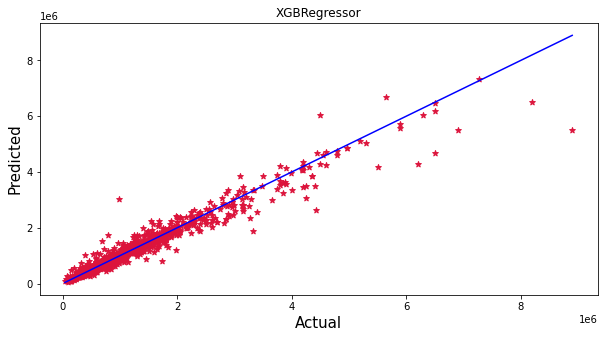

In [86]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [87]:
# Saving the predicted car price values in csv file
Predicted_Used_Car_Price.to_csv("Predicted_Used_Car_Price.csv",index=False)

## Conclusion

**Key Findings and Conclusion of the Study:** 
- The case study aims to give an idea of applying Machine Learning algorithms to predict the sale price of the used cars. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.
- First we collected the used cars data from website www.cardekho.com and it was done by using Web scraping. The framework used for web scraping was Selenium, which has an advantage of automating our process of collecting data. We collected almost 6541 of data which contained the selling price of the used cars and other related features. Then, the scrapped data was saved in a excel file so that we can use further and analyse the data.
- Then we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization. 
- From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Car_Price". By comparing car price and categorical variables we got to know that the cars having automatic gear transmission, cars from the city Bangalore, cars using petrol and diesel as fuels, cars having the brands Benz and BMW and cars with 5-7 seating capacity have high sale price. While comparing continuous numerical variables and Car_Price we found that cars which are having good milage, engine displacement, less running in kms have good linear relation with the price that is the cars with this kind of qualities have high selling prices.
- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Decision Tree Regressor, Random Forest Regressor, Extra Trees Regressor, GradientBoosting Regressor, Extreme Gradient Boosting Regressor (XGBoost), Bagging Regressor and KNeighbors Regressor.
- We got XGBoost Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tuning. So we concluded that XGBoost Regressor as the best algorithm as it was giving high R2 score after tuning.
- After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values.
- Overall, we can say that this dataset is good for predicting the sale price of used cars using regression analysis and conclude that XGBoost Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.